### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
user = pd.read_csv('user.csv')
raiting = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
pd.DataFrame(user.isnull().sum(), columns=['Missing'])

,Missing
user id,0
age,0
gender,0
occupation,0
zip code,0


In [4]:
pd.DataFrame(raiting.isnull().sum(), columns=['Missing'])

,Missing
user id,0
movie id,0
rating,0
timestamp,0


In [5]:
pd.DataFrame(movie.isnull().sum(), columns=['Missing'])

,Missing
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [7]:
# use sum on the default axis
movie.drop(axis=1, columns=["movie id","movie title","release date"]).sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [7]:
#hint: use sum on the axis = 1
df = pd.DataFrame(movie.drop(axis=1, columns=["movie id", "release date"]).set_index("movie title").sum(axis=1), columns=["genres"])
df[df["genres"] > 1]

,genres
movie title,
Toy Story,3
GoldenEye,3
Get Shorty,3
Copycat,3
Twelve Monkeys,2
...,...
MURDER and murder,3
Tainted,2
Mirage,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
df = movie[movie["unknown"] == 0]
df.shape

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [9]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [8]:
#your answers here
df = raiting.merge(movie, on="movie id")
df2 = df.merge(user, on="user id")
#movie[movie["movie id"] == 267] --> we have raitings or data of a movie that doesn't exisits in the movie dataframe
df2["release year"] = df2["release date"].apply(lambda x : datetime.strptime(x, '%d-%b-%Y').year)
df2

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code,release year
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,49,M,writer,55105,1997
1,196,257,2,881251577,Men in Black,04-Jul-1997,0,1,1,0,...,0,1,0,0,0,49,M,writer,55105,1997
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0,0,0,0,...,1,0,0,0,0,49,M,writer,55105,1996
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0,0,0,0,...,0,0,0,0,0,49,M,writer,55105,1996
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0,0,0,0,...,0,0,0,0,0,49,M,writer,55105,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,873,313,5,891392177,Titanic,01-Jan-1997,0,1,0,0,...,1,0,0,0,0,48,F,administrator,33763,1997
99987,873,326,4,891392656,G.I. Jane,01-Jan-1997,0,1,0,0,...,0,0,0,1,0,48,F,administrator,33763,1997
99988,873,348,3,891392577,Desperate Measures,30-Jan-1998,0,0,0,0,...,0,0,1,0,0,48,F,administrator,33763,1998
99989,873,358,2,891392698,Spawn,01-Aug-1997,0,1,1,0,...,0,1,1,0,0,48,F,administrator,33763,1997


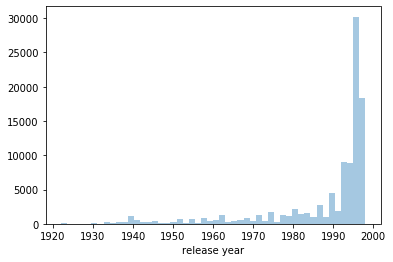

In [11]:
sns.distplot(df2["release year"], kde=False)

In [11]:
df2["year2"] = pd.DatetimeIndex(df['release date']).year

In [12]:
df2

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip code,release year,year2
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,49,M,writer,55105,1997,1997
1,196,257,2,881251577,Men in Black,04-Jul-1997,0,1,1,0,...,1,0,0,0,49,M,writer,55105,1997,1997
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0,0,0,0,...,0,0,0,0,49,M,writer,55105,1996,1997
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0,0,0,0,...,0,0,0,0,49,M,writer,55105,1996,1997
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0,0,0,0,...,0,0,0,0,49,M,writer,55105,1994,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,873,313,5,891392177,Titanic,01-Jan-1997,0,1,0,0,...,0,0,0,0,48,F,administrator,33763,1997,1962
99987,873,326,4,891392656,G.I. Jane,01-Jan-1997,0,1,0,0,...,0,0,1,0,48,F,administrator,33763,1997,1996
99988,873,348,3,891392577,Desperate Measures,30-Jan-1998,0,0,0,0,...,0,1,0,0,48,F,administrator,33763,1998,1996
99989,873,358,2,891392698,Spawn,01-Aug-1997,0,1,1,0,...,1,1,0,0,48,F,administrator,33763,1997,1996


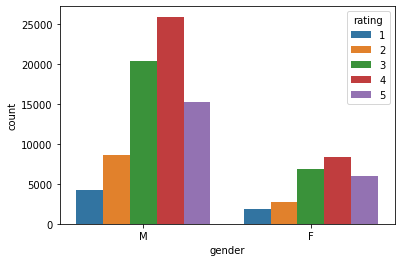

In [12]:
sns.countplot(data=df2, x="gender", hue="rating")

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

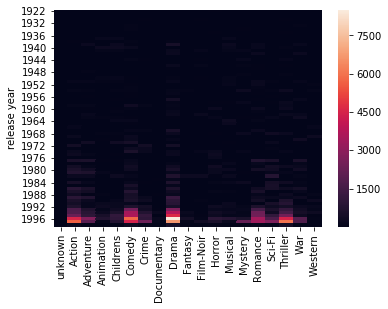

In [13]:
df8 = pd.DataFrame(df2.drop(axis=1, columns=["movie id", "release date", "user id", "rating", "timestamp", "movie title", "age", "gender", "occupation", "zip code"]).set_index("release year")).groupby(by=["release year"]).sum().sort_values(["release year"])
sns.heatmap(df8, vmin=1)

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [14]:
df9 = pd.DataFrame(df2[["movie title", "rating"]]).groupby(by=["movie title"]).sum().reset_index()
movies = df9[df9["rating"] > 100]["movie title"].values
df9a = pd.DataFrame(df2[["movie title", "rating"]]).groupby(by=["movie title"]).mean().reset_index()
df9

,movie title,rating
0,'Til There Was You,21
1,1-900,13
2,101 Dalmatians,317
3,12 Angry Men,543
4,187,124
...,...,...
1653,Young Guns,324
1654,Young Guns II,122
1655,"Young Poisoner's Handbook, The",137
1656,Zeus and Roxanne,13


In [17]:
df9a[df9a['movie title'].isin(movies)]

,movie title,rating
2,101 Dalmatians,2.908257
3,12 Angry Men,4.344000
4,187,3.024390
5,2 Days in the Valley,3.225806
6,"20,000 Leagues Under the Sea",3.500000
...,...,...
1648,Wyatt Earp,3.100000
1652,Young Frankenstein,3.945000
1653,Young Guns,3.207921
1654,Young Guns II,2.772727


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [20]:
df2[["gender", "rating", "Drama", "Romance", "Sci-Fi"]].groupby(by=["gender"]).sum().reset_index()

,gender,rating,Drama,Romance,Sci-Fi
0,F,90894,11008,5858,2629
1,M,262061,28887,13603,10101


In [32]:
women = df2[df2["gender"] == "F"]["gender"].count()
men = df2[df2["gender"] == "M"]["gender"].count()

In [35]:
print(df2.loc[(df2["gender"] == "F") & (df2["Drama"] == 1)]["gender"].count() / women)
print(df2.loc[(df2["gender"] == "M") & (df2["Drama"] == 1)]["gender"].count() / men)

0.4276944595539669
0.38903478647327383


In [36]:
print(df2.loc[(df2["gender"] == "F") & (df2["Sci-Fi"] == 1)]["gender"].count() / women)
print(df2.loc[(df2["gender"] == "M") & (df2["Sci-Fi"] == 1)]["gender"].count() / men)

0.10214468878700754
0.13603490768049775


In [37]:
print(df2.loc[(df2["gender"] == "F") & (df2["Romance"] == 1)]["gender"].count() / women)
print(df2.loc[(df2["gender"] == "M") & (df2["Romance"] == 1)]["gender"].count() / men)

0.22760121221540136
0.18319798526658856


<h1>Observations</h1>

1) Comparing percentage of rating for Drama movies between Men and Women, the results say that Women with a higher percentage 42%  watch more Drama movies than Men with 38% so the first sentence should be <b>FALSE</b>

2) The same for SCI-FI Men tend to watch more Sci-Fi movies than Women, so the second sentence is also <b>FALSE</b>

3) The third statement is also <b>FALSE</b> because women with 22% of the total of women rating movies watch Romance movies compared with men with an 18%
